In [68]:
import numpy as np

In [69]:
import pandas as pd

In [70]:
import matplotlib.pyplot as plt

In [71]:
import seaborn as sns

In [72]:
df=pd.read_csv('CarPrice_Assignment.csv')

In [73]:
df.shape

(205, 26)

In [74]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [75]:
print(df.columns.values)

['car_ID' 'symboling' 'CarName' 'fueltype' 'aspiration' 'doornumber'
 'carbody' 'drivewheel' 'enginelocation' 'wheelbase' 'carlength'
 'carwidth' 'carheight' 'curbweight' 'enginetype' 'cylindernumber'
 'enginesize' 'fuelsystem' 'boreratio' 'stroke' 'compressionratio'
 'horsepower' 'peakrpm' 'citympg' 'highwaympg' 'price']


In [76]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [78]:
df['CarName'].value_counts()

peugeot 504                6
toyota corolla             6
toyota corona              6
subaru dl                  4
mazda 626                  3
                          ..
nissan titan               1
buick opel isuzu deluxe    1
nissan teana               1
dodge monaco (sw)          1
audi fox                   1
Name: CarName, Length: 147, dtype: int64

In [79]:
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,"CompanyName",CompanyName)
df.drop(['CarName'],axis=1,inplace=True)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [80]:
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [81]:
df.CompanyName = df.CompanyName.str.lower()

In [82]:
df.CompanyName.replace('maxda','mazda',inplace=True)
df.CompanyName.replace('porcshce','porsche',inplace=True)
df.CompanyName.replace('toyouta','toyota',inplace=True)
df.CompanyName.replace('vokswagen','volkswagen',inplace=True)
df.CompanyName.replace('vw','volkswagen',inplace=True)

In [83]:
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [84]:
df.loc[df.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [85]:
print(df.price.describe())

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


In [86]:
df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

<ipython-input-87-94a2b19d53b5>:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  plt1 = df.symboling.value_counts().plot('bar')


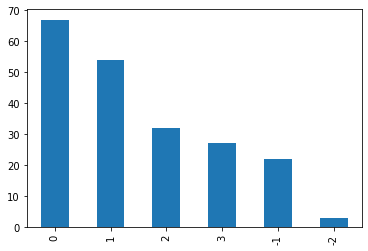

In [87]:
plt1 = df.symboling.value_counts().plot('bar')


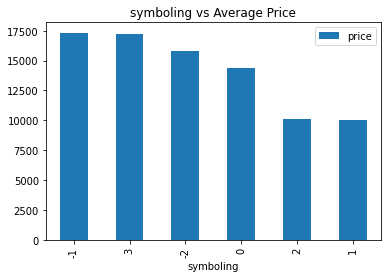

In [88]:
df1 = pd.DataFrame(df.groupby(['symboling'])['price'].mean().sort_values(ascending = False))
df1.plot.bar()
plt.title('symboling vs Average Price')
plt.show()

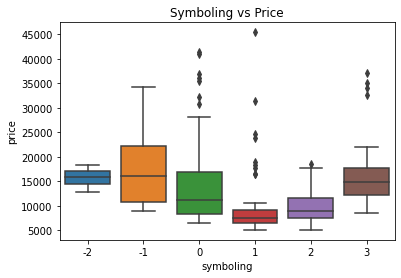

In [89]:
plt.title('Symboling vs Price')
sns.boxplot(x=df.symboling, y=df.price)
plt.show()

<ipython-input-90-1026256bea40>:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  plt1 = df.CompanyName.value_counts().plot('bar')


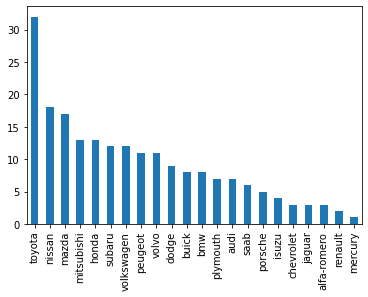

In [90]:
plt1 = df.CompanyName.value_counts().plot('bar')

<ipython-input-91-9a765b592ac6>:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  plt1 = df.fueltype.value_counts().plot('bar')


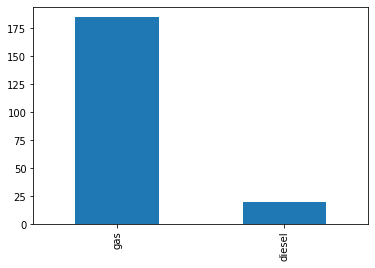

In [91]:
plt1 = df.fueltype.value_counts().plot('bar')

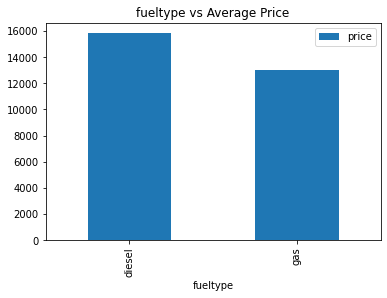

In [92]:
df1 = pd.DataFrame(df.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df1.plot.bar()
plt.title('fueltype vs Average Price')
plt.show()

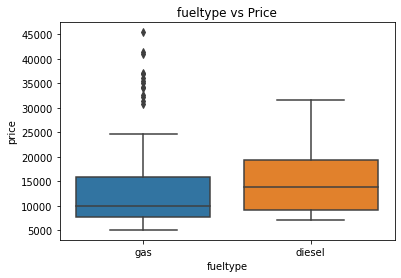

In [93]:
plt.title('fueltype vs Price')
sns.boxplot(x=df.fueltype, y=df.price)
plt.show()

/home/ptnv-s/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


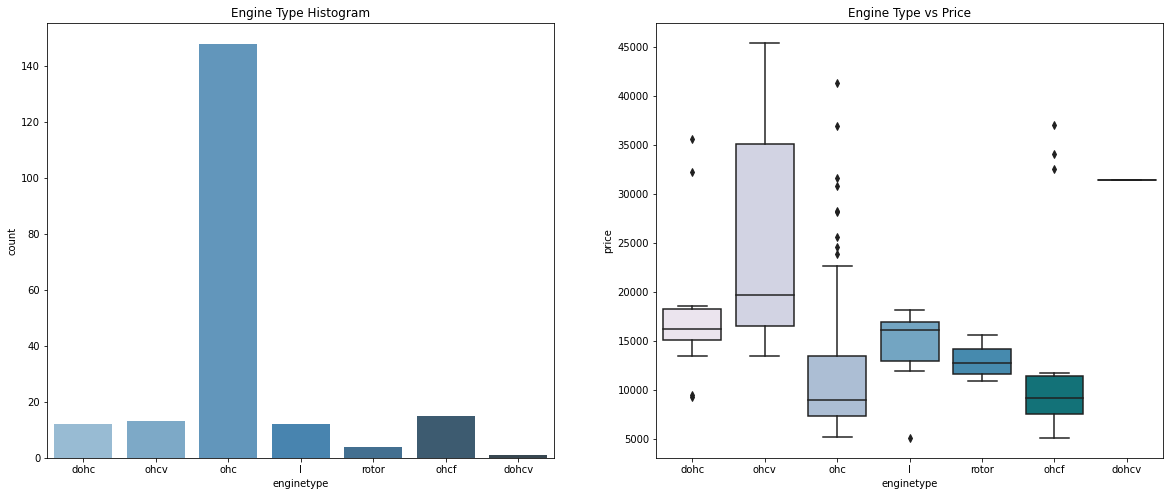

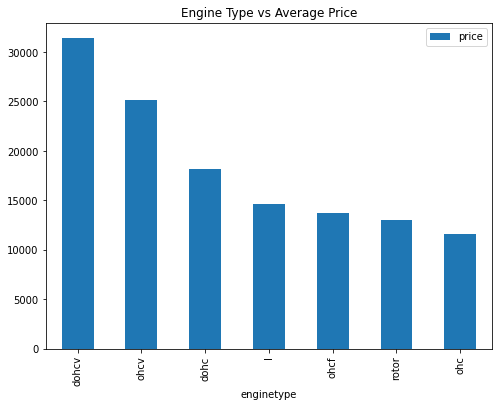

In [94]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(df.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=df.enginetype, y=df.price, palette=("PuBuGn"))

plt.show()

df1 = pd.DataFrame(df.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df1.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()


/home/ptnv-s/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


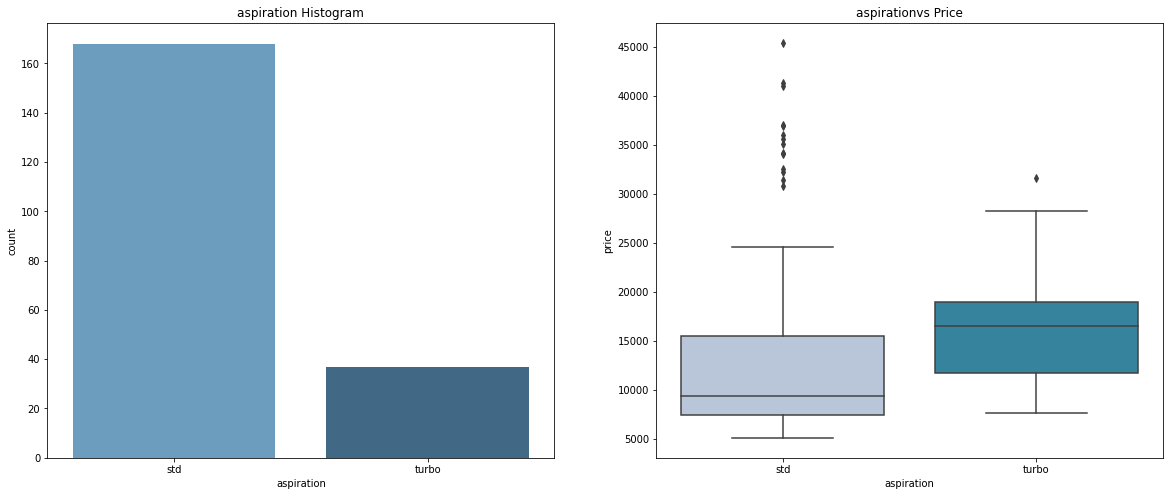

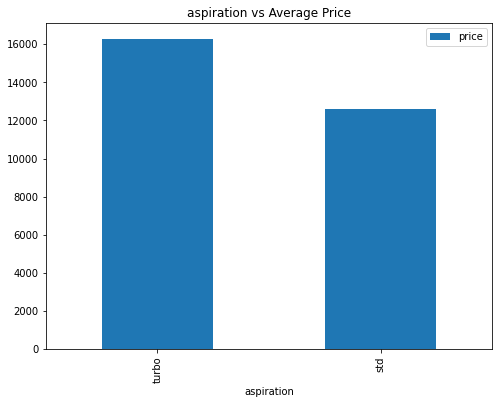

In [95]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('aspiration Histogram')
sns.countplot(df.aspiration, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('aspirationvs Price')
sns.boxplot(x=df.aspiration, y=df.price, palette=("PuBuGn"))

plt.show()

df1 = pd.DataFrame(df.groupby(['aspiration'])['price'].mean().sort_values(ascending = False))
df1.plot.bar(figsize=(8,6))
plt.title('aspiration vs Average Price')
plt.show()


/home/ptnv-s/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


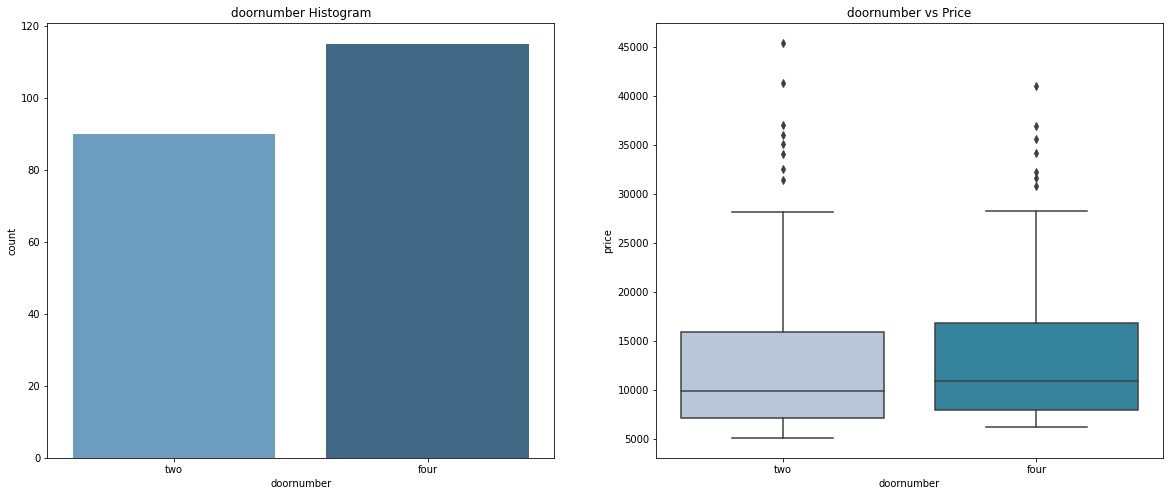

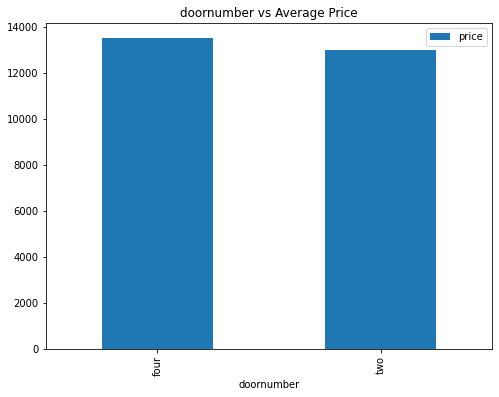

In [96]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('doornumber Histogram')
sns.countplot(df.doornumber, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('doornumber vs Price')
sns.boxplot(x=df.doornumber, y=df.price, palette=("PuBuGn"))

plt.show()

df1 = pd.DataFrame(df.groupby(['doornumber'])['price'].mean().sort_values(ascending = False))
df1.plot.bar(figsize=(8,6))
plt.title('doornumber vs Average Price')
plt.show()


/home/ptnv-s/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


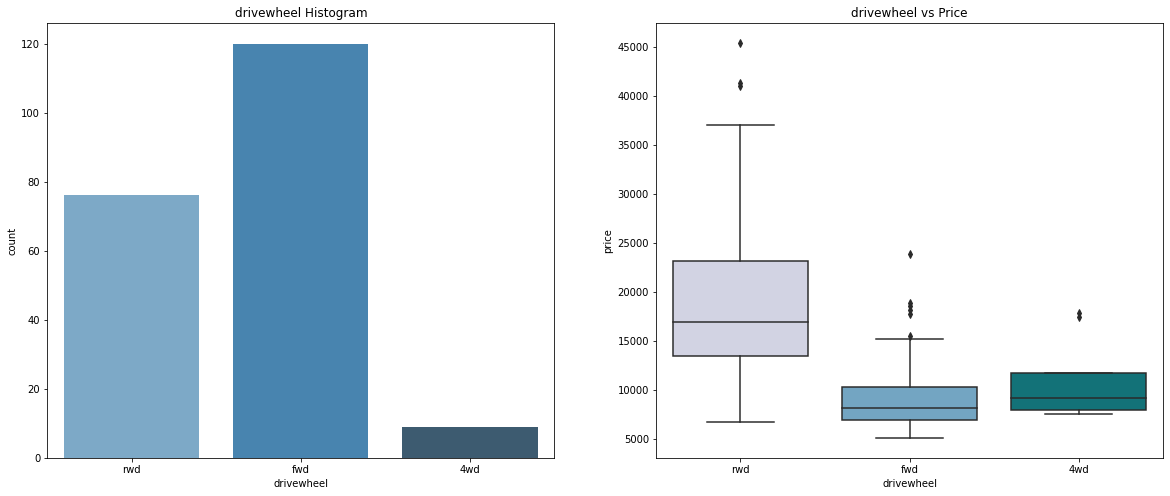

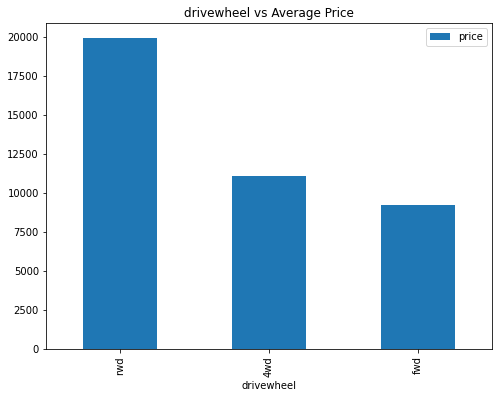

In [97]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('drivewheel Histogram')
sns.countplot(df.drivewheel, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('drivewheel vs Price')
sns.boxplot(x=df.drivewheel, y=df.price, palette=("PuBuGn"))

plt.show()

df1 = pd.DataFrame(df.groupby(['drivewheel'])['price'].mean().sort_values(ascending = False))
df1.plot.bar(figsize=(8,6))
plt.title('drivewheel vs Average Price')
plt.show()


/home/ptnv-s/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


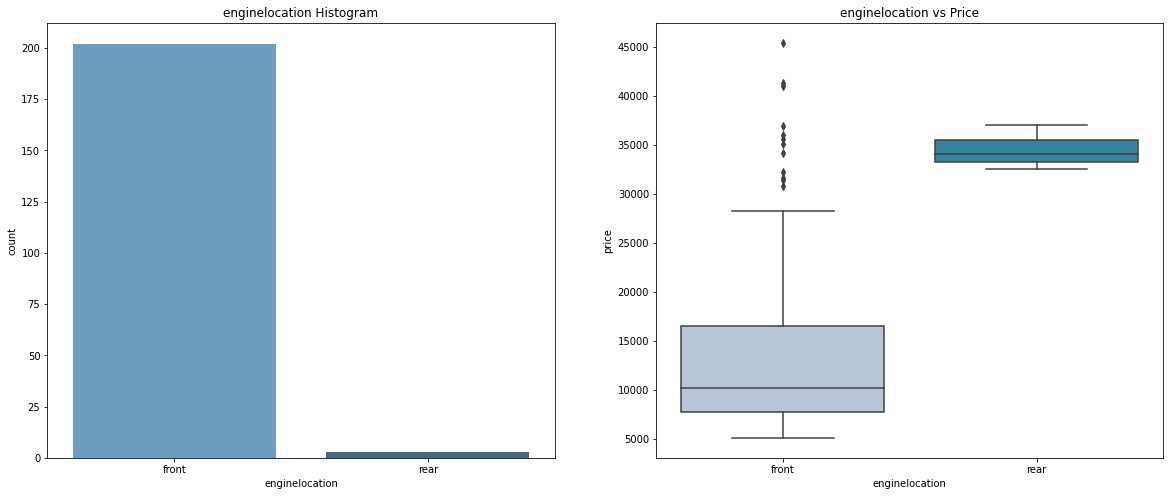

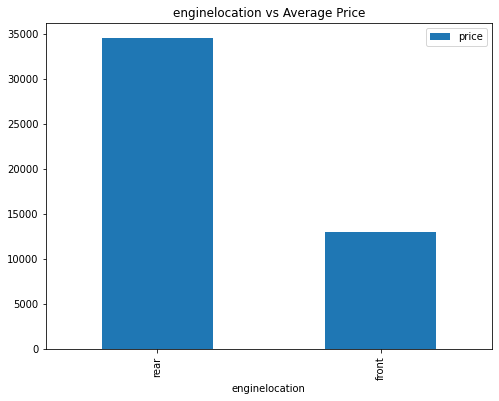

In [98]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('enginelocation Histogram')
sns.countplot(df.enginelocation, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('enginelocation vs Price')
sns.boxplot(x=df.enginelocation, y=df.price, palette=("PuBuGn"))

plt.show()

df1 = pd.DataFrame(df.groupby(['enginelocation'])['price'].mean().sort_values(ascending = False))
df1.plot.bar(figsize=(8,6))
plt.title('enginelocation vs Average Price')
plt.show()


/home/ptnv-s/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


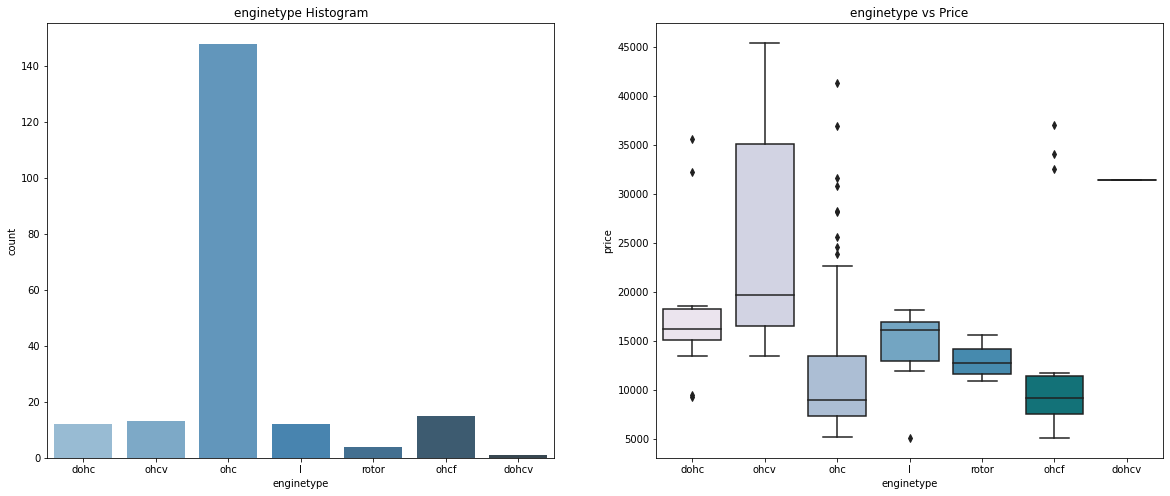

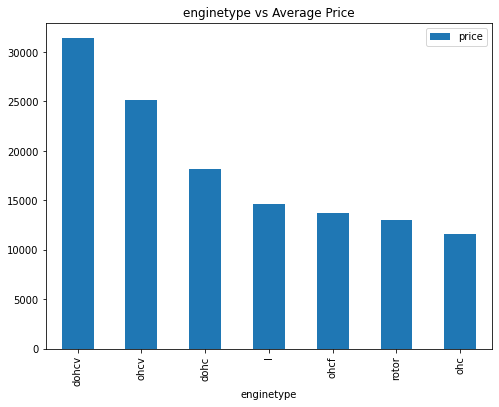

In [99]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('enginetype Histogram')
sns.countplot(df.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('enginetype vs Price')
sns.boxplot(x=df.enginetype, y=df.price, palette=("PuBuGn"))

plt.show()

df1 = pd.DataFrame(df.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df1.plot.bar(figsize=(8,6))
plt.title('enginetype vs Average Price')
plt.show()


/home/ptnv-s/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


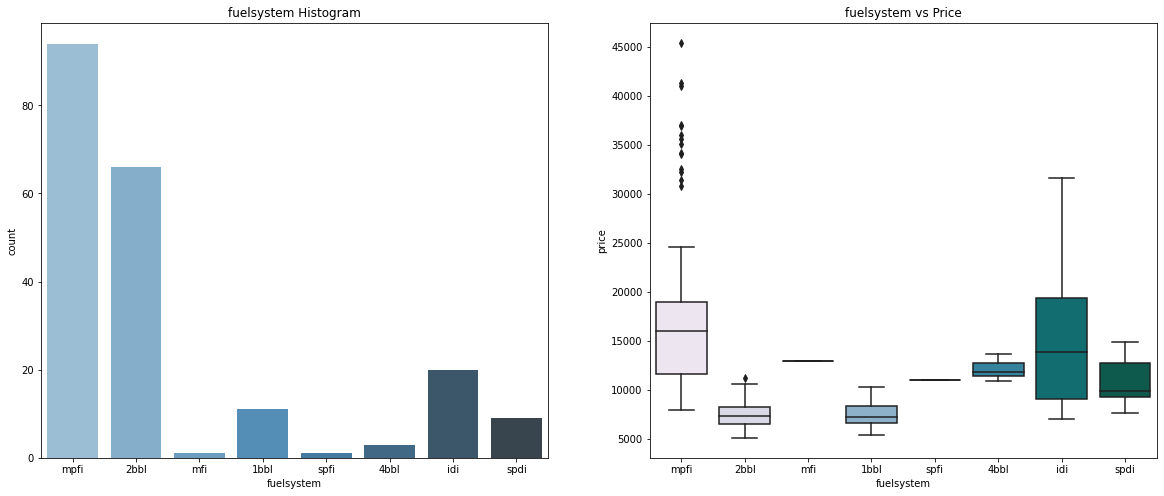

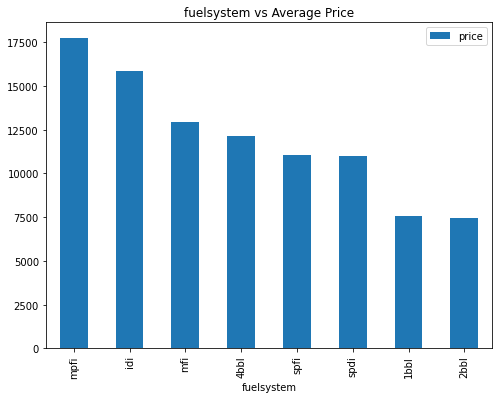

In [100]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('fuelsystem Histogram')
sns.countplot(df.fuelsystem, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('fuelsystem vs Price')
sns.boxplot(x=df.fuelsystem, y=df.price, palette=("PuBuGn"))

plt.show()

df1 = pd.DataFrame(df.groupby(['fuelsystem'])['price'].mean().sort_values(ascending = False))
df1.plot.bar(figsize=(8,6))
plt.title('fuelsystem vs Average Price')
plt.show()

/home/ptnv-s/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


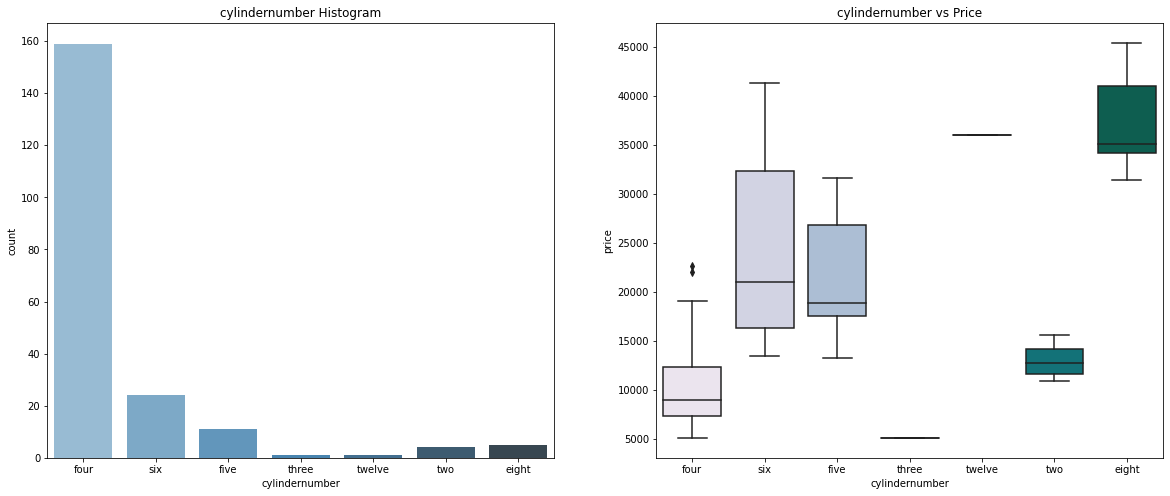

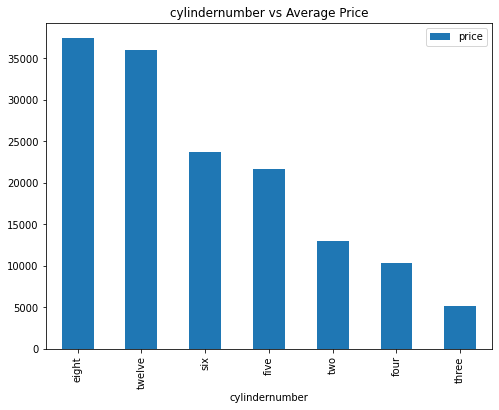

In [101]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('cylindernumber Histogram')
sns.countplot(df.cylindernumber, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('cylindernumber vs Price')
sns.boxplot(x=df.cylindernumber, y=df.price, palette=("PuBuGn"))

plt.show()

df1 = pd.DataFrame(df.groupby(['cylindernumber'])['price'].mean().sort_values(ascending = False))
df1.plot.bar(figsize=(8,6))
plt.title('cylindernumber vs Average Price')
plt.show()

In [102]:
df.horsepower.unique()

array([111, 154, 102, 115, 110, 140, 160, 101, 121, 182,  48,  70,  68,
        88, 145,  58,  76,  60,  86, 100,  78,  90, 176, 262, 135,  84,
        64, 120,  72, 123, 155, 184, 175, 116,  69,  55,  97, 152, 200,
        95, 142, 143, 207, 288,  73,  82,  94,  62,  56, 112,  92, 161,
       156,  52,  85, 114, 162, 134, 106])

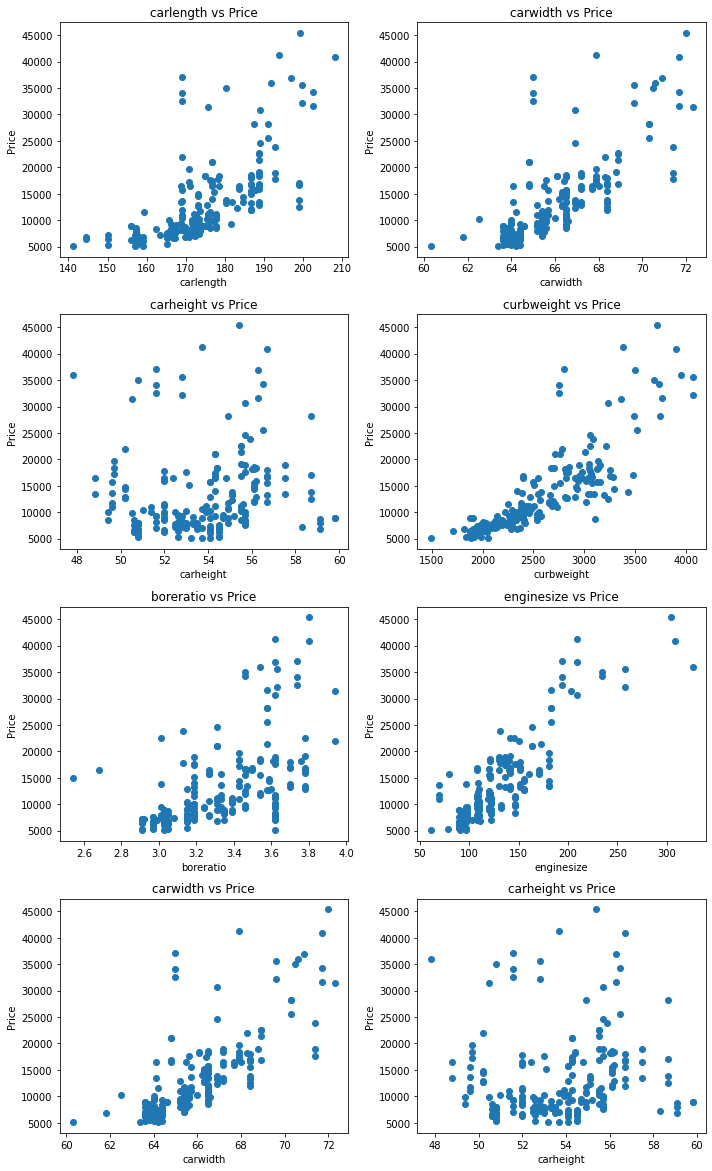

In [103]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)
scatter('boreratio', 5)
scatter('enginesize', 6)
scatter('carwidth', 7)
scatter('carheight', 8)

plt.tight_layout()


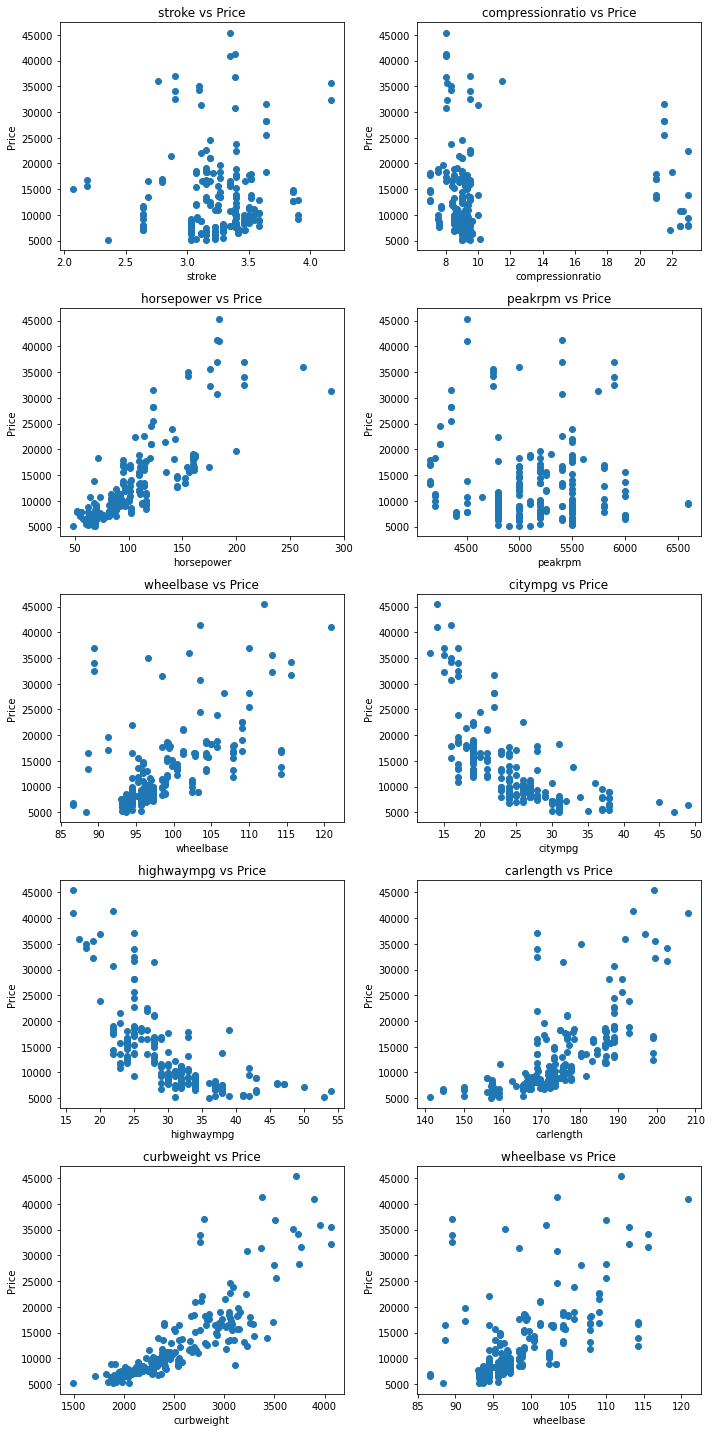

In [104]:
plt.figure(figsize=(10,20))
scatter('stroke', 1)
scatter('compressionratio', 2)
scatter('horsepower', 3)
scatter('peakrpm', 4)
scatter('wheelbase', 5)
scatter('citympg', 6)
scatter('highwaympg', 7)
scatter('carlength', 8)
scatter('curbweight', 9)
scatter('wheelbase', 10)
plt.tight_layout()


In [105]:
df['fueleconomy'] = (0.50* df['citympg']) + (0.50* df['highwaympg'])

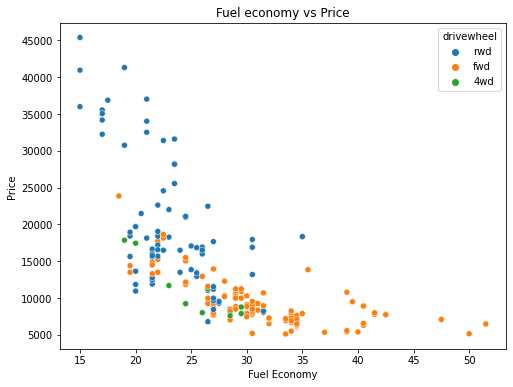

<Figure size 432x288 with 0 Axes>

In [106]:
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=df['fueleconomy'],y=df['price'],hue=df['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

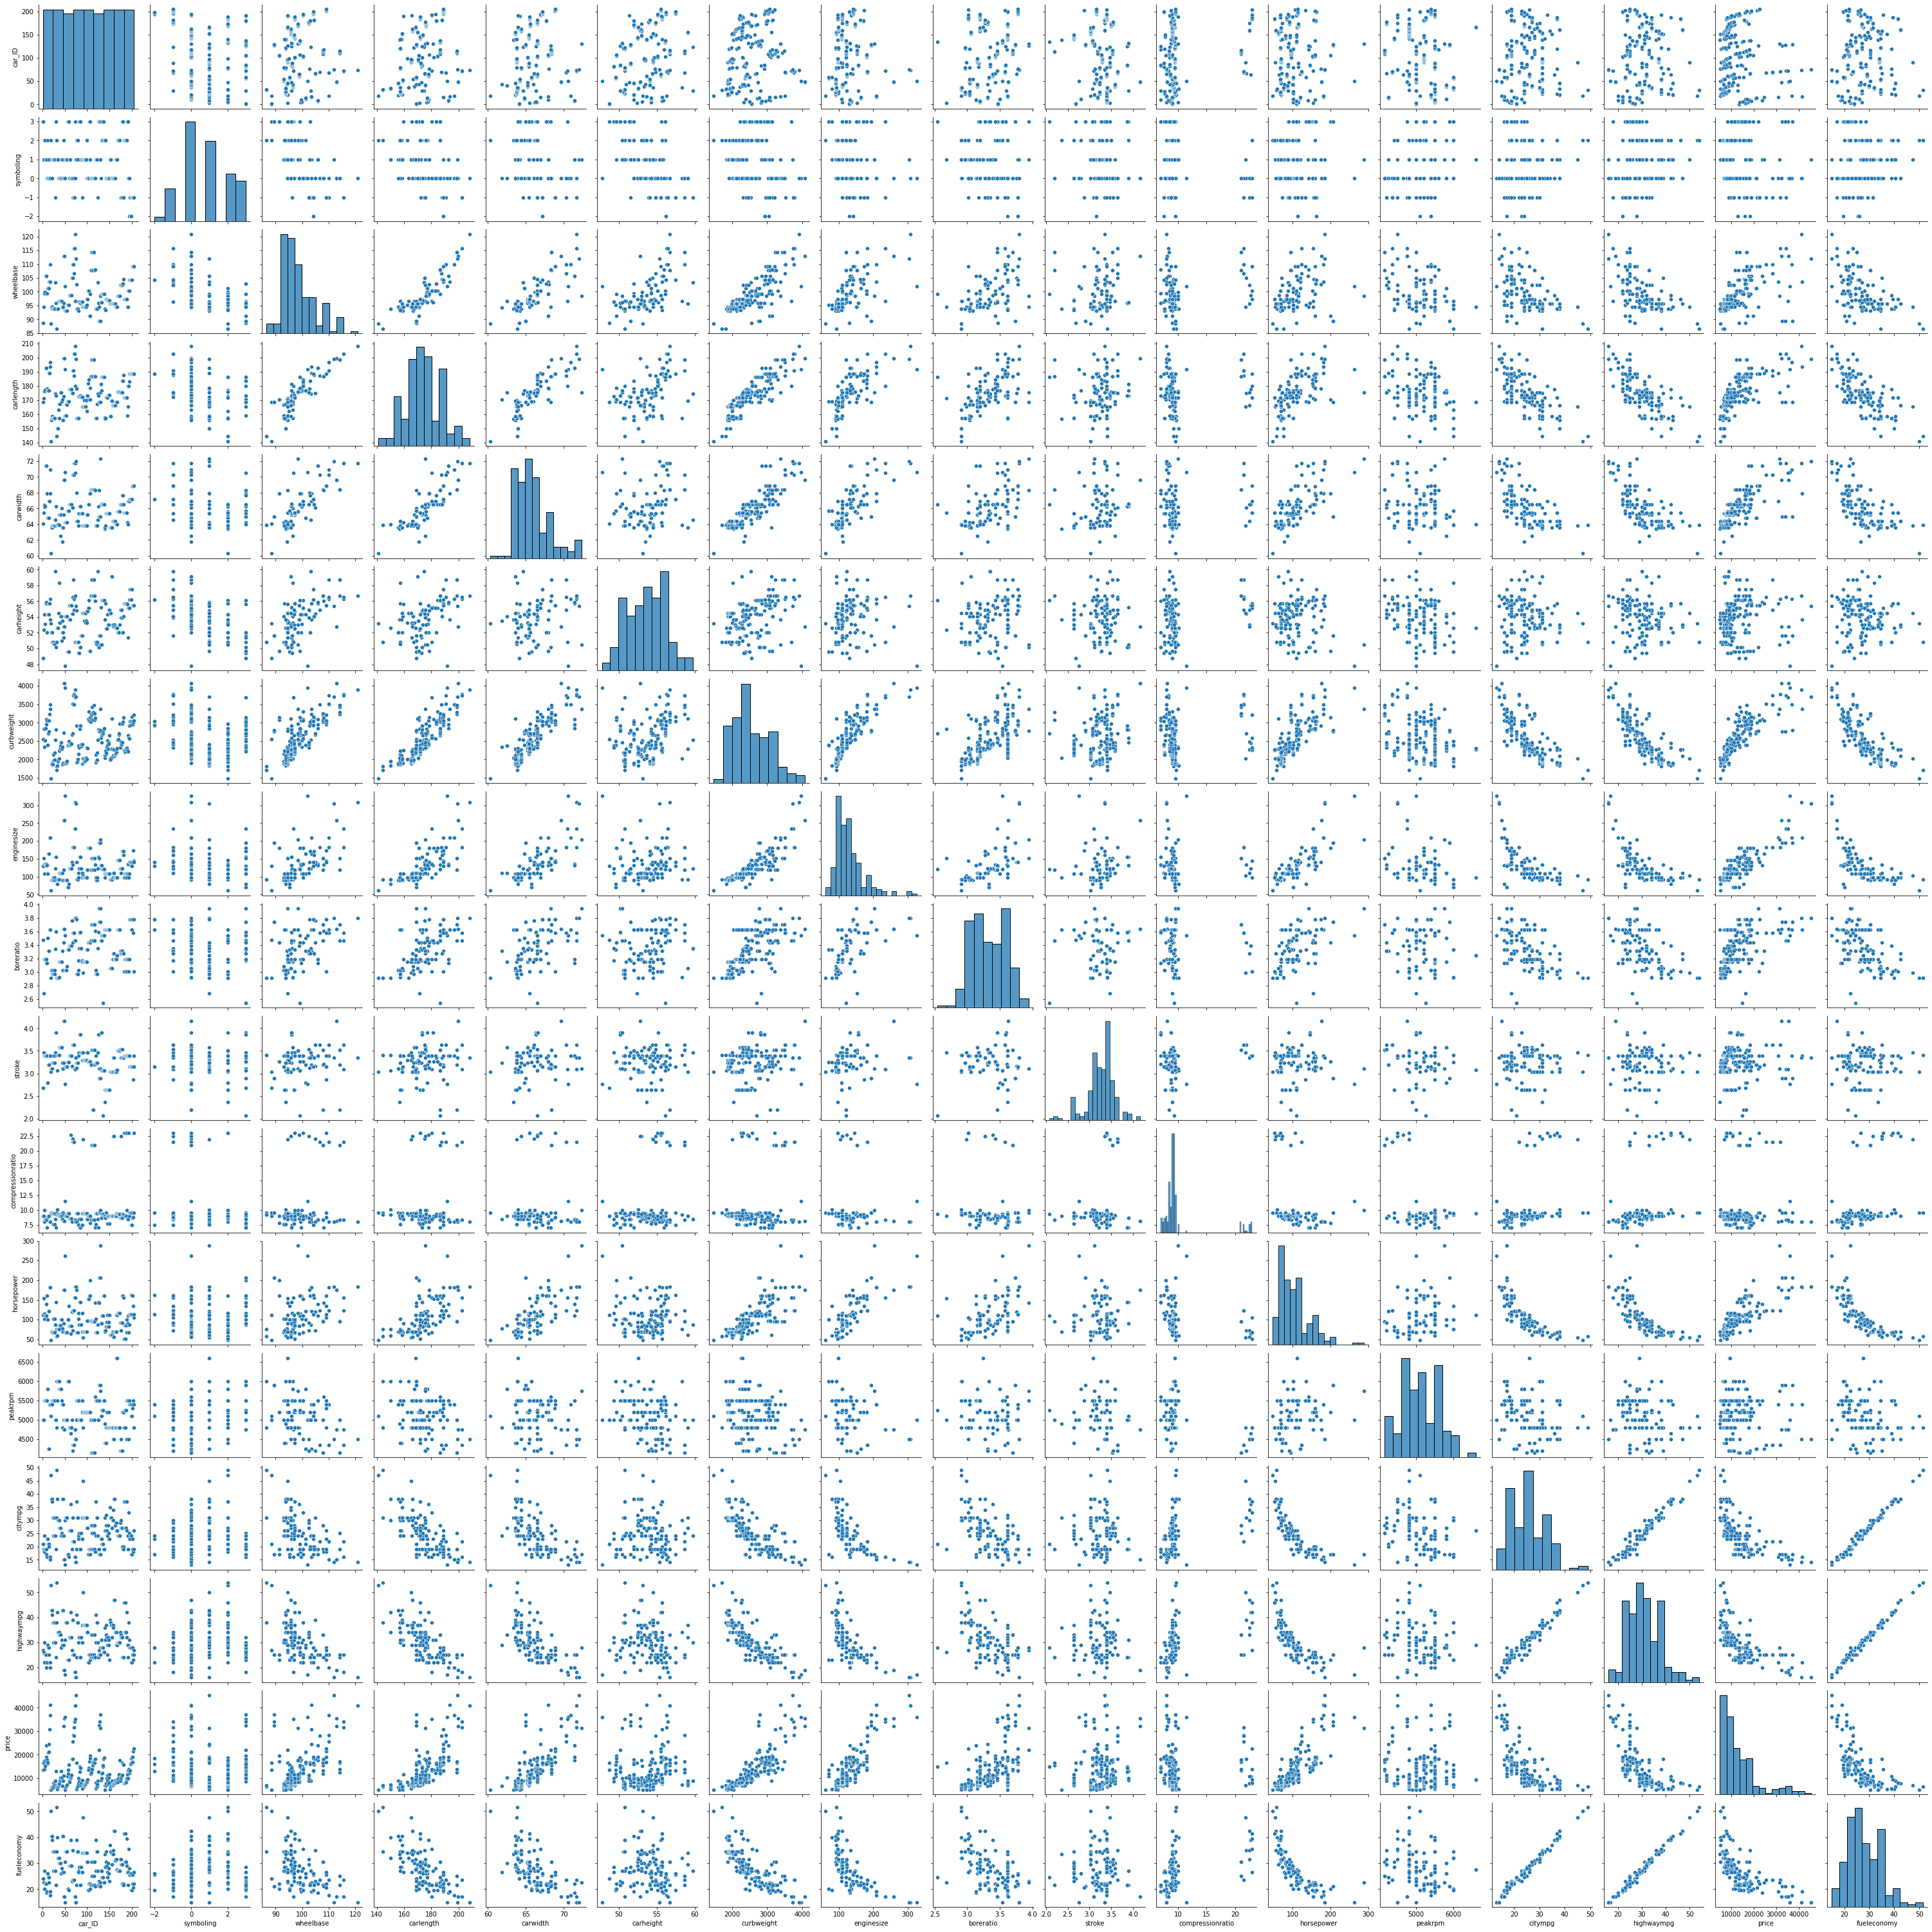

In [107]:
sns.pairplot(df)
plt.show()

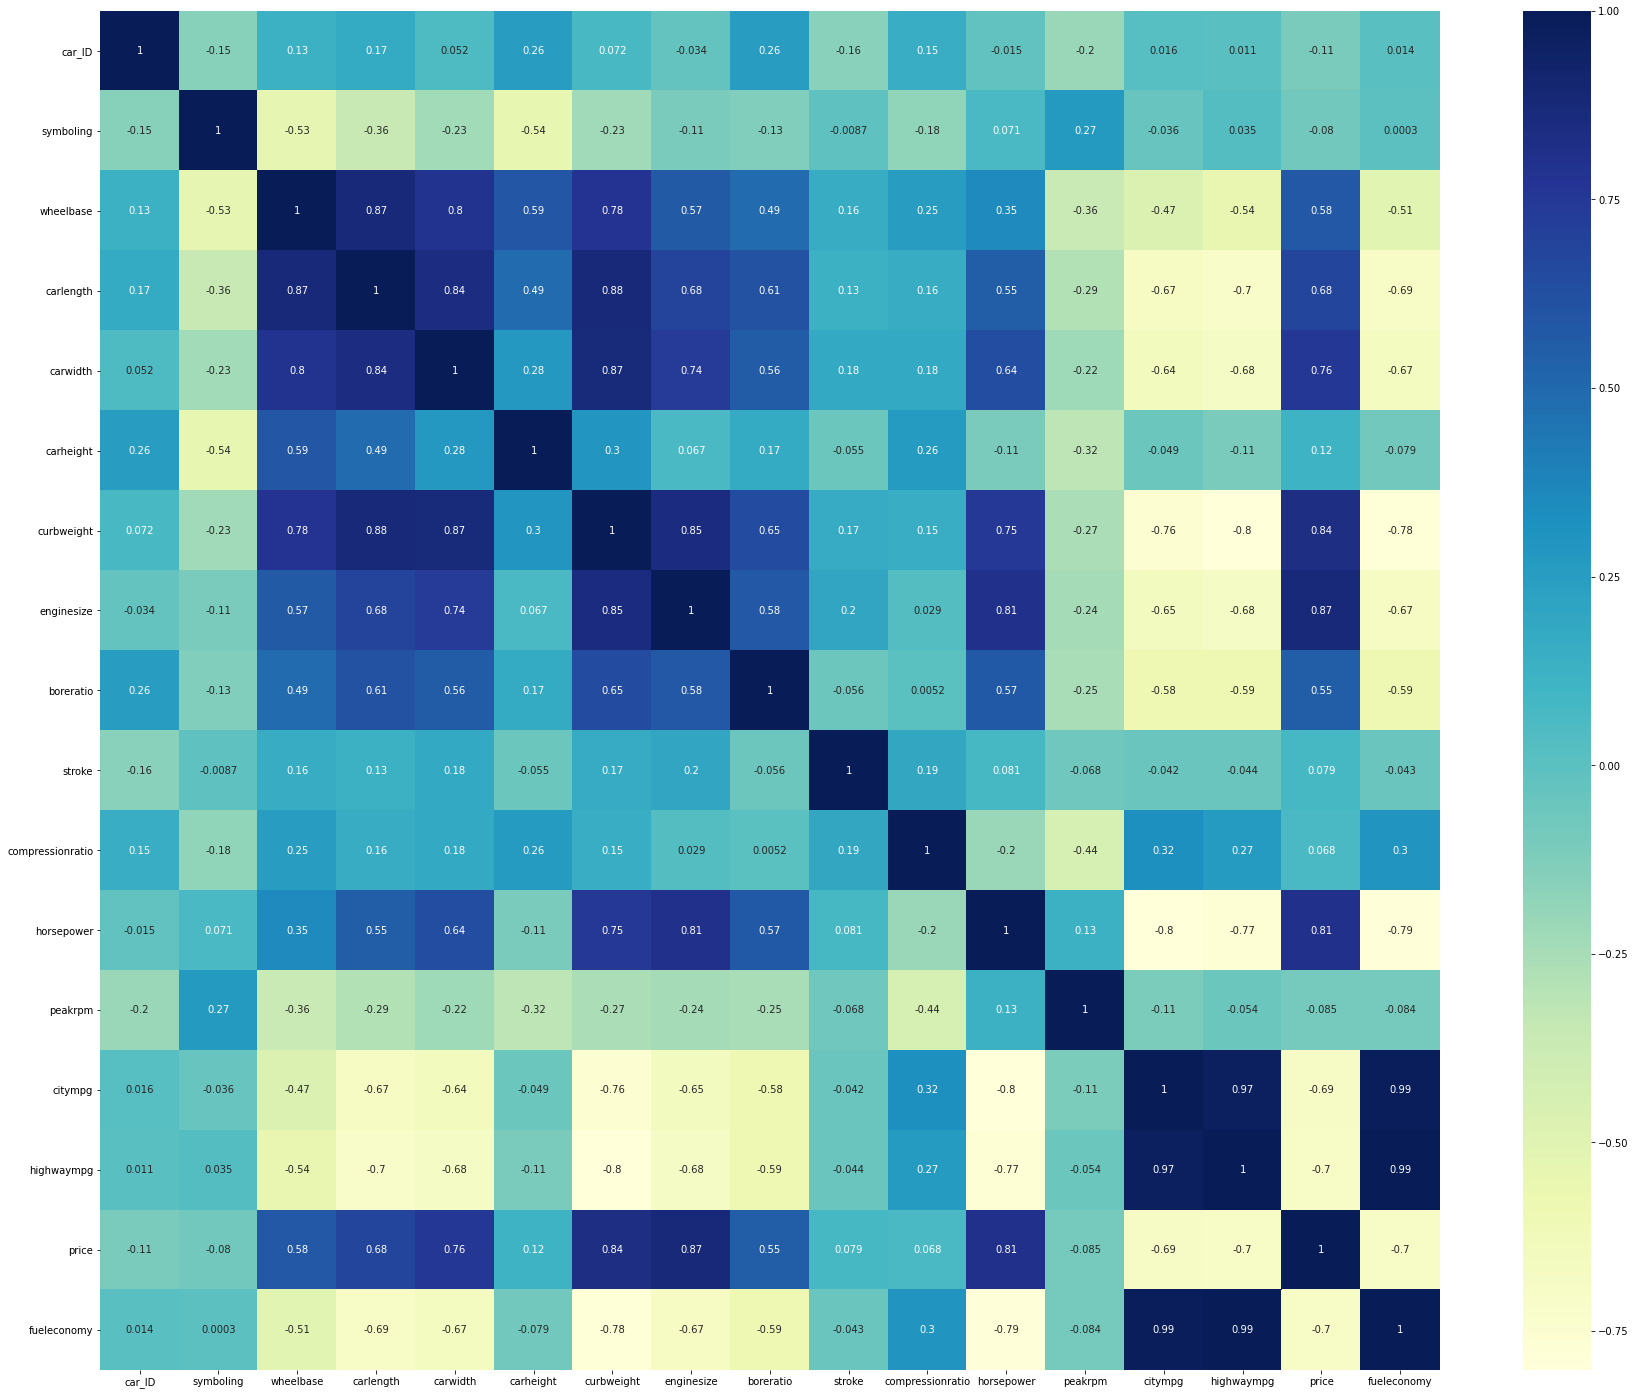

In [108]:
plt.figure(figsize = (30, 25))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CompanyName         205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [110]:
df_final = df[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth']]
df_final.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth
0,13495.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,24.0,168.8,64.1
1,16500.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,24.0,168.8,64.1
2,16500.0,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.5,171.2,65.5
3,13950.0,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,27.0,176.6,66.2
4,17450.0,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,20.0,176.6,66.4


In [111]:
df_final.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [112]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
price             205 non-null float64
fueltype          205 non-null object
aspiration        205 non-null object
carbody           205 non-null object
drivewheel        205 non-null object
wheelbase         205 non-null float64
curbweight        205 non-null int64
enginetype        205 non-null object
cylindernumber    205 non-null object
enginesize        205 non-null int64
boreratio         205 non-null float64
horsepower        205 non-null int64
fueleconomy       205 non-null float64
carlength         205 non-null float64
carwidth          205 non-null float64
dtypes: float64(6), int64(3), object(6)
memory usage: 24.1+ KB


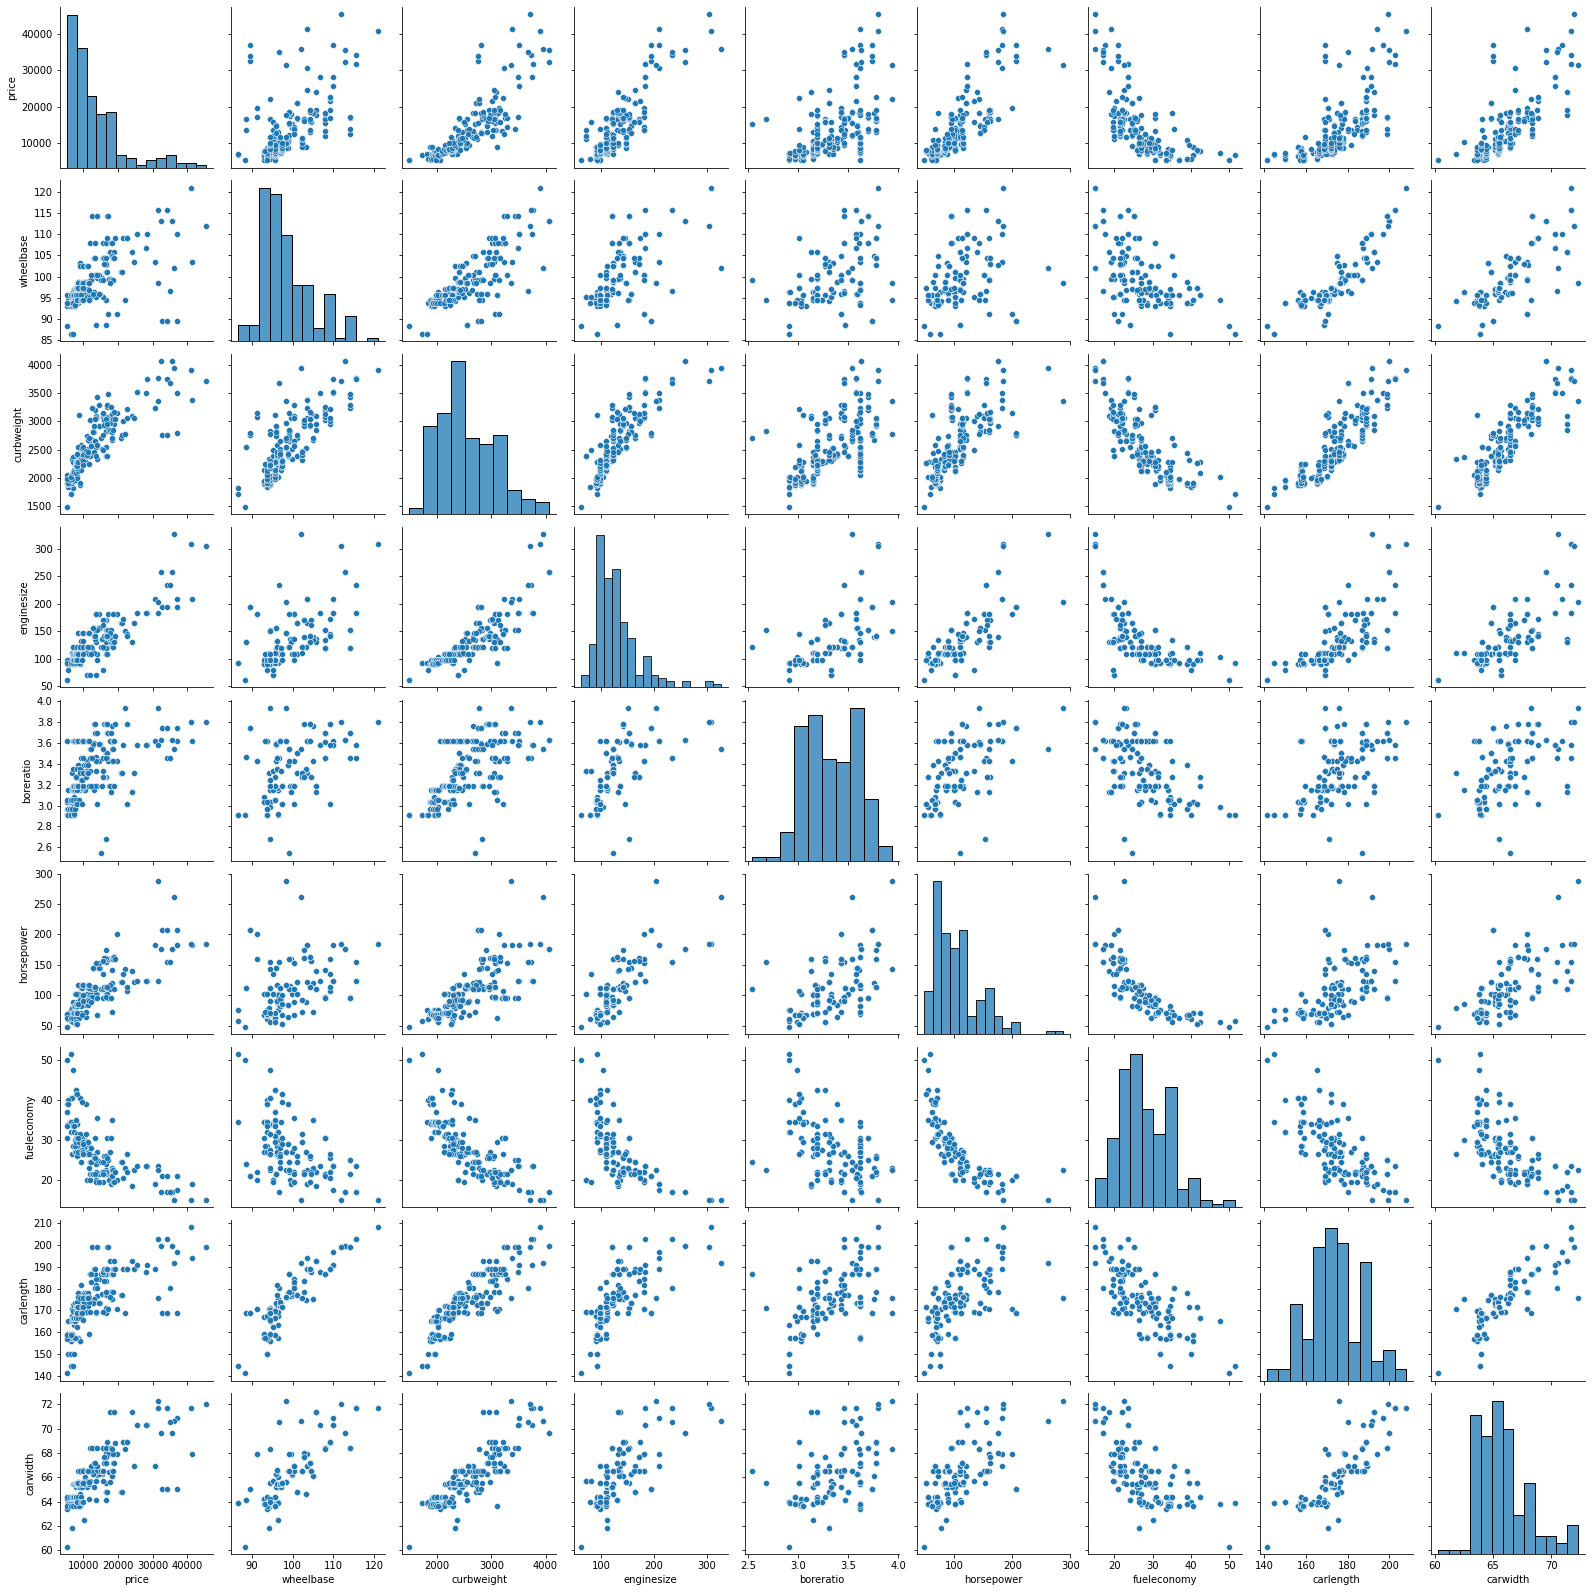

In [113]:
sns.pairplot(df_final)
plt.show()

In [114]:
# Defining the map function
def dummies(x,df1):
    temp = pd.get_dummies(df1[x], drop_first = True)
    df1 = pd.concat([df1, temp], axis = 1)
    df1.drop([x], axis = 1, inplace = True)
    return df1
# Applying the function to the cars_lr
df_final= dummies('fueltype', df_final)
df_final= dummies('aspiration',df_final)
df_final= dummies('carbody',df_final)
df_final= dummies('drivewheel',df_final)
df_final= dummies('enginetype',df_final)
df_final= dummies('cylindernumber',df_final)

In [115]:
df_final.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,13495.0,88.6,2548,130,3.47,111,24.0,168.8,64.1,1,...,0,0,0,0,0,1,0,0,0,0
1,16500.0,88.6,2548,130,3.47,111,24.0,168.8,64.1,1,...,0,0,0,0,0,1,0,0,0,0
2,16500.0,94.5,2823,152,2.68,154,22.5,171.2,65.5,1,...,0,0,1,0,0,0,1,0,0,0
3,13950.0,99.8,2337,109,3.19,102,27.0,176.6,66.2,1,...,1,0,0,0,0,1,0,0,0,0
4,17450.0,99.4,2824,136,3.19,115,20.0,176.6,66.4,1,...,1,0,0,0,1,0,0,0,0,0


In [116]:
df_final.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,13276.710571,98.756585,2555.565854,126.907317,3.329756,104.117073,27.985366,174.049268,65.907805,0.902439,...,0.721951,0.073171,0.063415,0.019512,0.053659,0.775610,0.117073,0.004878,0.004878,0.019512
std,7988.852332,6.021776,520.680204,41.642693,0.270844,39.544167,6.666038,12.337289,2.145204,0.297446,...,0.449134,0.261054,0.244304,0.138655,0.225894,0.418201,0.322294,0.069843,0.069843,0.138655
min,5118.000000,86.600000,1488.000000,61.000000,2.540000,48.000000,15.000000,141.100000,60.300000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7788.000000,94.500000,2145.000000,97.000000,3.150000,70.000000,22.500000,166.300000,64.100000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,10295.000000,97.000000,2414.000000,120.000000,3.310000,95.000000,27.000000,173.200000,65.500000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,16503.000000,102.400000,2935.000000,141.000000,3.580000,116.000000,32.000000,183.100000,66.900000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,45400.000000,120.900000,4066.000000,326.000000,3.940000,288.000000,51.500000,208.100000,72.300000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [117]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 29 columns):
price          205 non-null float64
wheelbase      205 non-null float64
curbweight     205 non-null int64
enginesize     205 non-null int64
boreratio      205 non-null float64
horsepower     205 non-null int64
fueleconomy    205 non-null float64
carlength      205 non-null float64
carwidth       205 non-null float64
gas            205 non-null uint8
turbo          205 non-null uint8
hardtop        205 non-null uint8
hatchback      205 non-null uint8
sedan          205 non-null uint8
wagon          205 non-null uint8
fwd            205 non-null uint8
rwd            205 non-null uint8
dohcv          205 non-null uint8
l              205 non-null uint8
ohc            205 non-null uint8
ohcf           205 non-null uint8
ohcv           205 non-null uint8
rotor          205 non-null uint8
five           205 non-null uint8
four           205 non-null uint8
six            205 non-null uint8

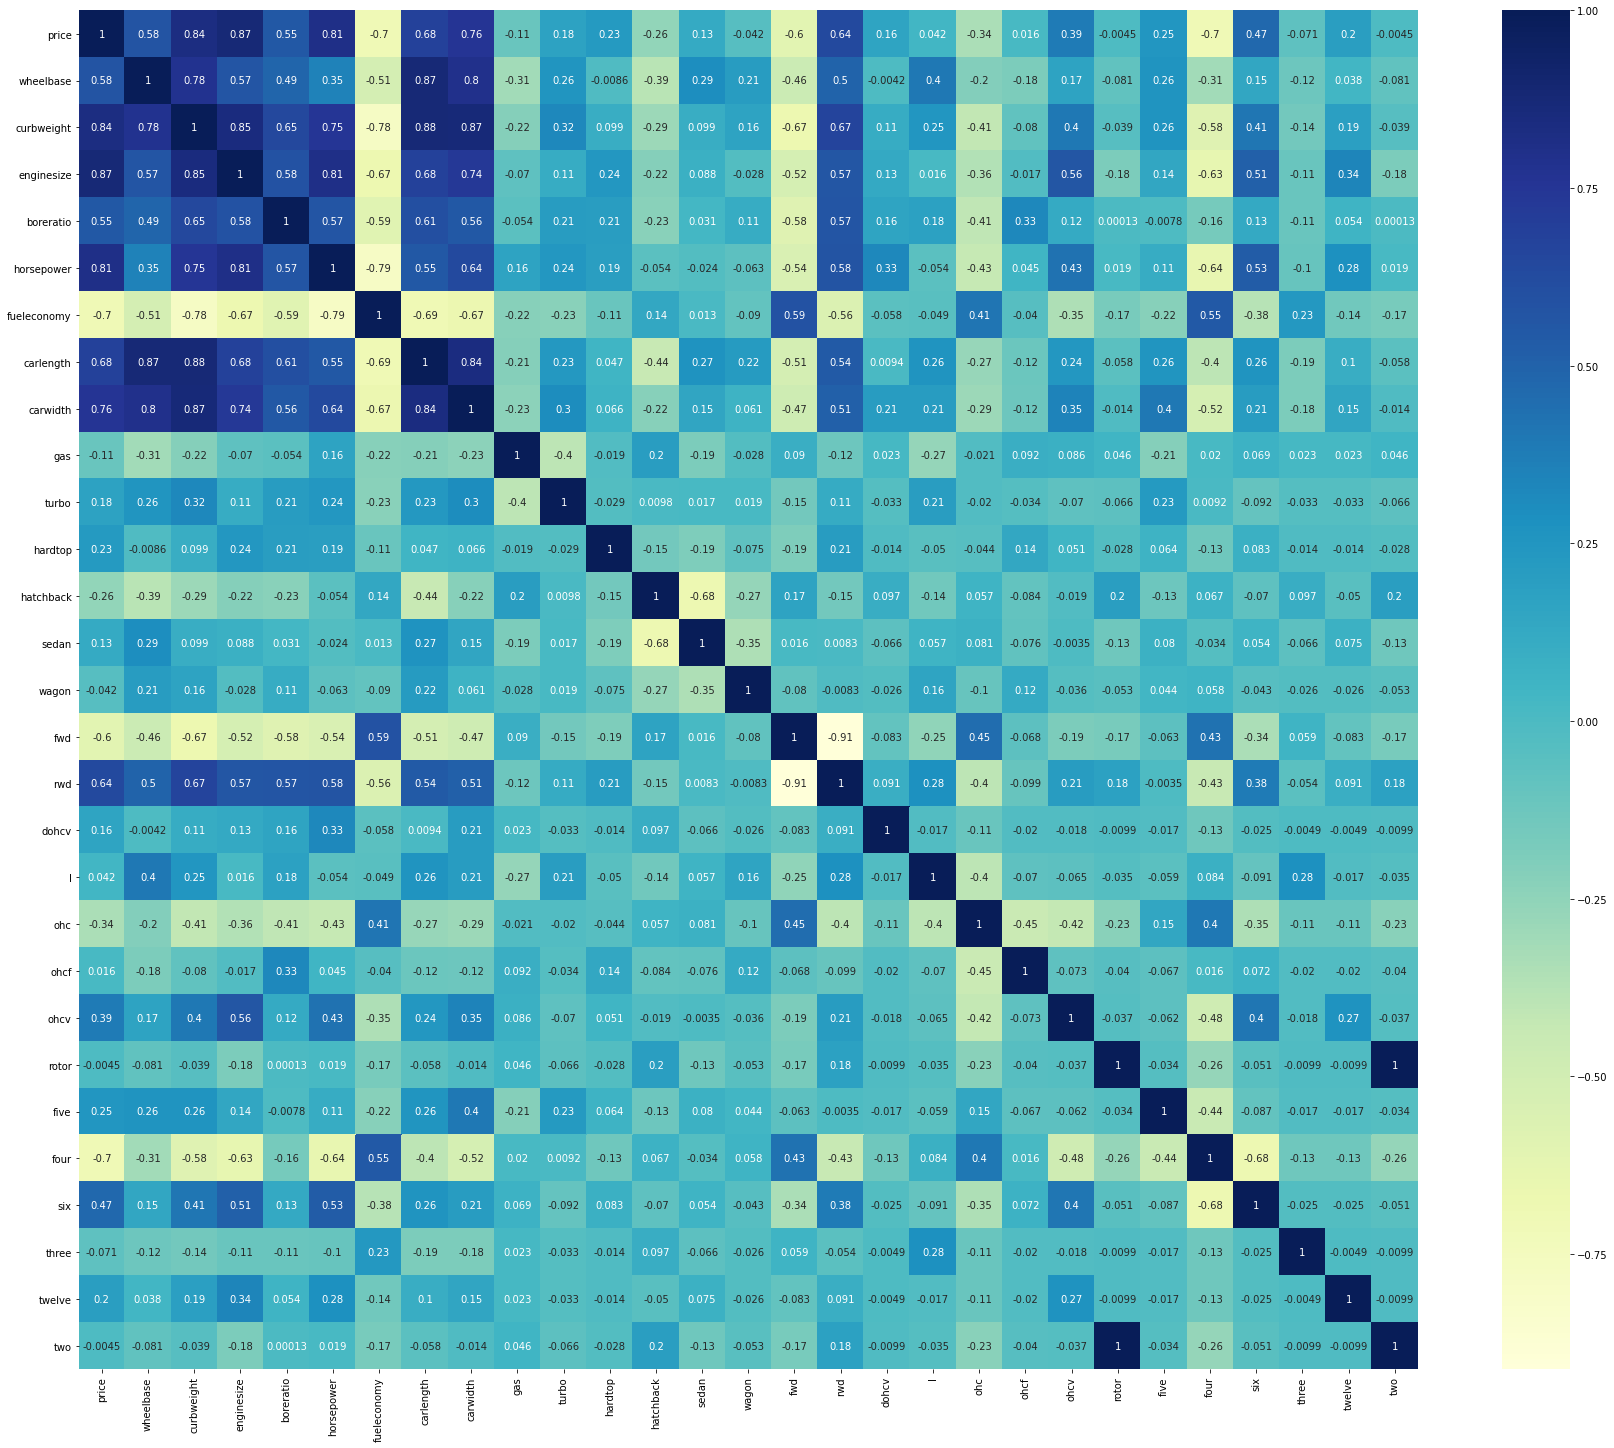

In [118]:
plt.figure(figsize = (30, 25))
sns.heatmap(df_final.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [120]:
X= df_final.iloc[:,1:28].values
y= df_final.iloc[:,0].values

In [121]:
print(X)

[[8.860e+01 2.548e+03 1.300e+02 ... 0.000e+00 0.000e+00 0.000e+00]
 [8.860e+01 2.548e+03 1.300e+02 ... 0.000e+00 0.000e+00 0.000e+00]
 [9.450e+01 2.823e+03 1.520e+02 ... 1.000e+00 0.000e+00 0.000e+00]
 ...
 [1.091e+02 3.012e+03 1.730e+02 ... 1.000e+00 0.000e+00 0.000e+00]
 [1.091e+02 3.217e+03 1.450e+02 ... 1.000e+00 0.000e+00 0.000e+00]
 [1.091e+02 3.062e+03 1.410e+02 ... 0.000e+00 0.000e+00 0.000e+00]]


In [122]:
print(y)

[13495.    16500.    16500.    13950.    17450.    15250.    17710.
 18920.    23875.    17859.167 16430.    16925.    20970.    21105.
 24565.    30760.    41315.    36880.     5151.     6295.     6575.
  5572.     6377.     7957.     6229.     6692.     7609.     8558.
  8921.    12964.     6479.     6855.     5399.     6529.     7129.
  7295.     7295.     7895.     9095.     8845.    10295.    12945.
 10345.     6785.     8916.5    8916.5   11048.    32250.    35550.
 36000.     5195.     6095.     6795.     6695.     7395.    10945.
 11845.    13645.    15645.     8845.     8495.    10595.    10245.
 10795.    11245.    18280.    18344.    25552.    28248.    28176.
 31600.    34184.    35056.    40960.    45400.    16503.     5389.
  6189.     6669.     7689.     9959.     8499.    12629.    14869.
 14489.     6989.     8189.     9279.     9279.     5499.     7099.
  6649.     6849.     7349.     7299.     7799.     7499.     7999.
  8249.     8949.     9549.    13499.    14399. 

In [123]:
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)
linear=LinearRegression()
linear.fit(x_train,y_train)



LinearRegression()

In [124]:
result = linear.predict(x_test)

In [126]:
linear.predict(x_test)

array([ 5438.79787979, 22568.31441456, 16519.47587066, 13636.48882262,
       10853.88533841, 15024.88128004,  6185.95494126,  4743.05657484,
       17042.53534409,  6830.72399663, 22112.78313532, 45351.02040737,
       12546.23295142, 15039.73727946,  7156.76092033, 13767.65953867,
        9701.31207876, 19233.91653931,  8535.18592662,  5437.00085595,
       10261.22484705, 13765.51702575,  9404.88848545, 14324.61796347,
       23142.03749336,  6723.83617209,  7162.54843165, 13817.94198851,
        6040.48148681,  6168.91967876,  9403.52004337, 10202.48521682,
       16722.5007185 , 11450.29342692,  6336.34889849, 30442.04177376,
       13952.25293487, 11290.61791467,  5470.05806417, 37359.91268189,
        7037.16862053])

In [128]:
linear.intercept_

-17251.128889239193

In [129]:
linear.coef_

array([ 1.37134081e+02,  3.41692285e+00,  3.12677206e+01, -2.60423144e+03,
        8.19551774e+01,  5.99348971e+01, -4.62111625e+01,  4.00239399e+02,
       -1.51064538e+03, -7.27086966e+02, -4.84867122e+03, -5.66852683e+03,
       -4.55620329e+03, -5.52150066e+03,  9.72626970e+02,  2.92965669e+03,
        1.37333700e-10,  1.01347747e+03,  3.40965361e+03,  5.66235455e+03,
       -5.21224078e+03, -8.63313955e+03, -1.14182160e+04, -1.47280233e+04,
       -9.70464055e+03,  0.00000000e+00, -8.62775909e+03])

In [130]:
linear.score(X,y)

0.8899390940136039